In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import (figure, title, boxplot, xticks, subplot, hist,
                               xlabel, ylim, yticks, show, savefig, plot, ylabel,
                               colorbar, imshow)
from scipy.io import loadmat
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from toolbox_02450 import mcnemar
from sklearn.discriminant_analysis import StandardScaler


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from numpy import cov


c:\Users\nicol\Desktop\ML_DataMining\Project 2\Repo_clonata\02450_ML_Projects_Group_177\project_2\toolbox_02450\__init__.py:115: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if display is 'verbose':


In [5]:
df = pd.read_csv('hour.csv')

In [6]:
# PREPROCESSING

# Removing useless attributes
df = df.drop('dteday', axis=1)
df = df.drop('instant', axis=1)
df = df.drop('yr', axis=1)

# Applying sqrt to "cnt" (to make it a continuous variable)
df['cnt'] = np.sqrt(df['cnt'])

# Removing deprecated attributes after the sqrt transformation (cnt = casual + registered)
df = df.drop('casual', axis=1)
df = df.drop('registered', axis=1)

df.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,4.000000
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,6.324555
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5.656854
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3.605551
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1.000000


temp
25.42    726
27.06    693
26.24    692
28.70    690
24.60    675
14.76    671
13.94    645
12.30    641
16.40    614
13.12    611
22.96    579
29.52    570
22.14    569
18.86    559
10.66    559
21.32    556
17.22    548
20.50    531
9.84     522
30.34    516
18.04    507
9.02     421
31.16    396
15.58    372
8.20     354
27.88    349
32.80    325
23.78    305
11.48    301
19.68    288
6.56     230
33.62    213
31.98    169
7.38     155
5.74     138
34.44    138
35.26    131
36.90     90
4.92      76
36.08     53
4.10      51
37.72     49
38.54     17
3.28      17
0.82      17
1.64      16
2.46      16
39.36     16
40.18      1
41.00      1
Name: count, dtype: int64


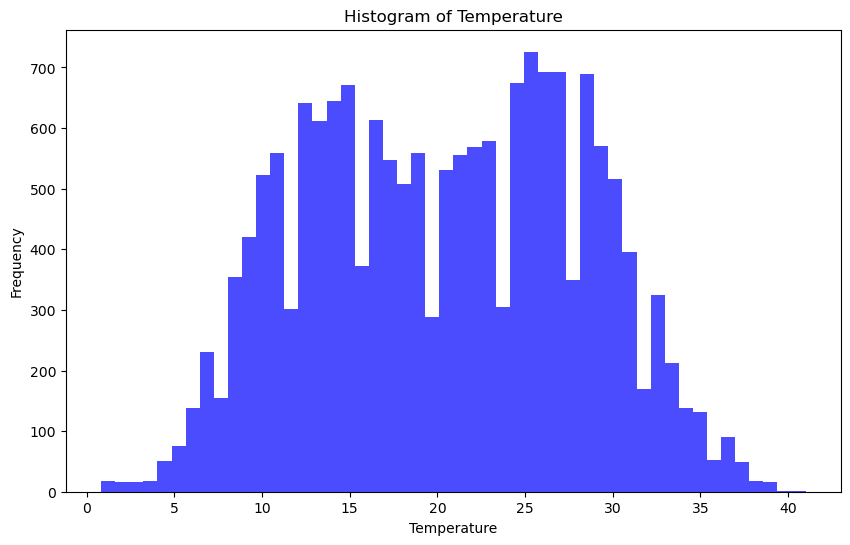

In [7]:
df['temp'] = df['temp'] * 41
print(df['temp'].value_counts())


# Plot a histogram for the 'temp' attribute
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df['temp'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.show()

In [8]:
df.temp.describe()

count    17379.000000
mean        20.376474
std          7.894801
min          0.820000
25%         13.940000
50%         20.500000
75%         27.060000
max         41.000000
Name: temp, dtype: float64

In [9]:
# Quantize the temperature attribute into 4 levels

bins = [0, 10, 20, 30, 41]
names = ['cold', 'cool', 'warm', 'hot']

df['temp'] = pd.cut(df['temp'], bins, labels=names)


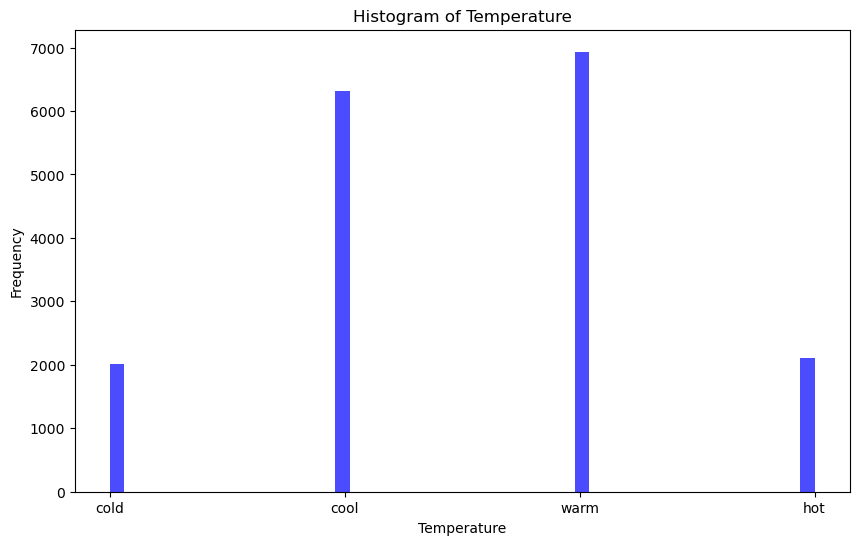

In [10]:
# Plot a histogram for the 'temp' attribute
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df['temp'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.show()

In [11]:
# Define X and y
X = df.drop(['holiday', 'weekday', 'workingday', 'atemp', 'temp'], axis=1).values
y = df['temp'].values

attributeNames = df.columns.drop(['holiday', 'weekday', 'workingday', 'atemp', 'temp']).tolist()
classNames = names
N, M = X.shape
C = len(classNames)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10, stratify=y)

# Standardize the training and test set based on training set mean and std
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic regression

Minimum test error: 48.33 % at 1e3.78


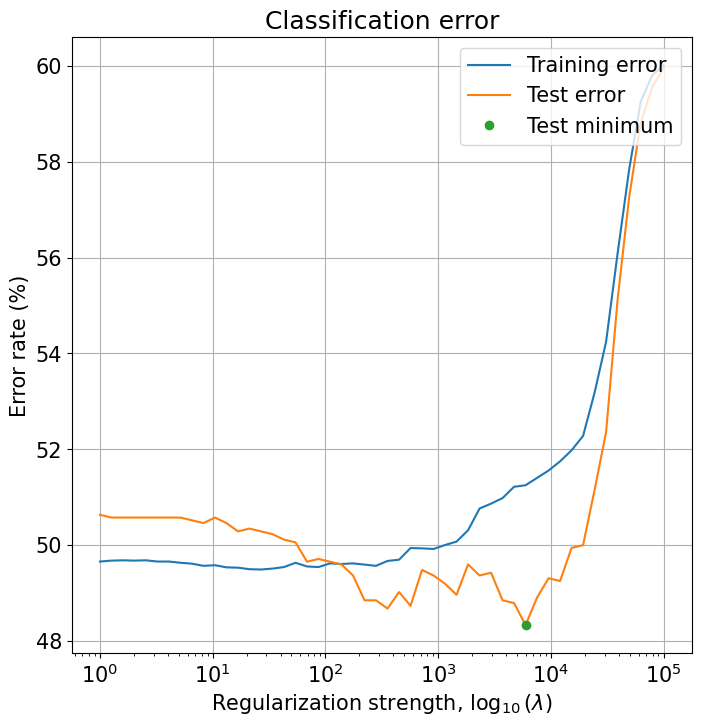

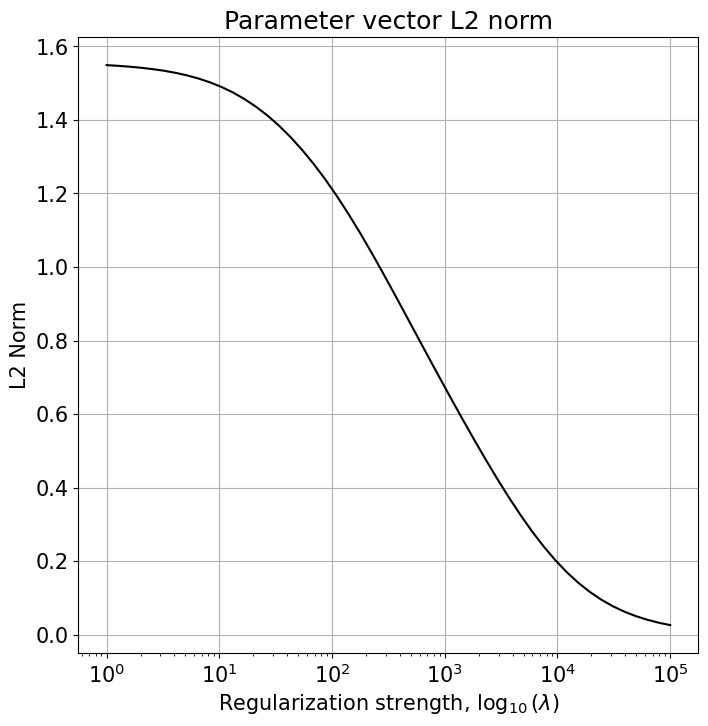

In [9]:
# Fit regularized logistic regression model to training data
lambda_interval = np.logspace(0, 5, 50)
train_error_rate = np.zeros(len(lambda_interval))
test_error_rate = np.zeros(len(lambda_interval))
coefficient_norm = np.zeros(len(lambda_interval))
for k in range(0, len(lambda_interval)):
    mdl = LogisticRegression(penalty='l2', C=1/lambda_interval[k], multi_class='multinomial', solver='lbfgs', random_state=1)
    
    mdl.fit(X_train, y_train)

    y_train_est = mdl.predict(X_train).T
    y_test_est = mdl.predict(X_test).T
    
    train_error_rate[k] = np.sum(y_train_est != y_train) / len(y_train)
    test_error_rate[k] = np.sum(y_test_est != y_test) / len(y_test)

    w_est = mdl.coef_[0] 
    coefficient_norm[k] = np.sqrt(np.sum(w_est**2))

min_error = np.min(test_error_rate)
opt_lambda_idx = np.argmin(test_error_rate)
opt_lambda = lambda_interval[opt_lambda_idx]

font_size = 15
plt.rcParams.update({'font.size': font_size})

plt.figure(figsize=(8,8))
#plt.plot(np.log10(lambda_interval), train_error_rate*100)
#plt.plot(np.log10(lambda_interval), test_error_rate*100)
#plt.plot(np.log10(opt_lambda), min_error*100, 'o')
plt.semilogx(lambda_interval, train_error_rate*100)
plt.semilogx(lambda_interval, test_error_rate*100)
plt.semilogx(opt_lambda, min_error*100, 'o')
print("Minimum test error: " + str(np.round(min_error*100,2)) + ' % at 1e' + str(np.round(np.log10(opt_lambda),2)))
plt.xlabel('Regularization strength, $\log_{10}(\lambda)$')
plt.ylabel('Error rate (%)')
plt.title('Classification error')
plt.legend(['Training error','Test error','Test minimum'],loc='upper right')
plt.grid()
plt.show()    

plt.figure(figsize=(8,8))
plt.semilogx(lambda_interval, coefficient_norm,'k')
plt.ylabel('L2 Norm')
plt.xlabel('Regularization strength, $\log_{10}(\lambda)$')
plt.title('Parameter vector L2 norm')
plt.grid()
plt.show()    


## KNN

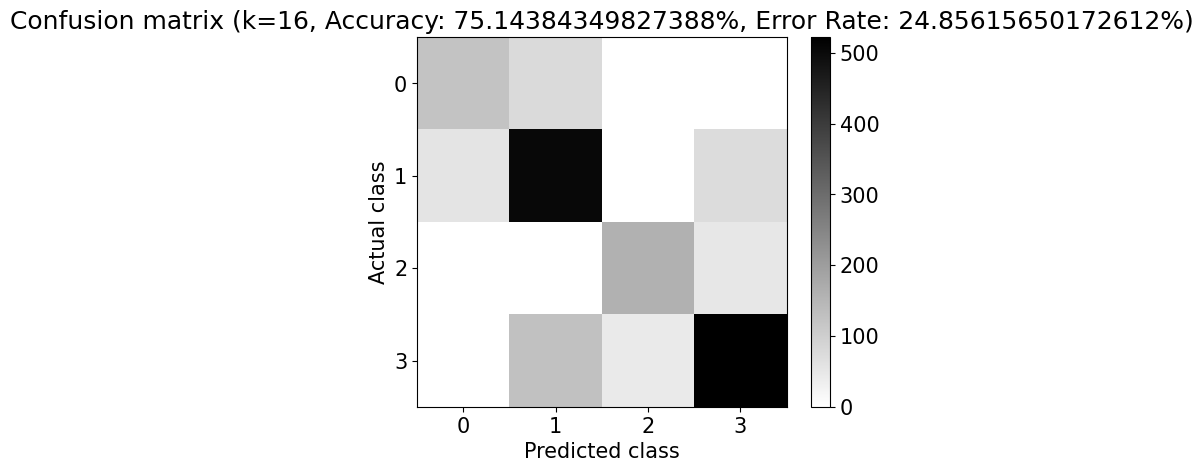

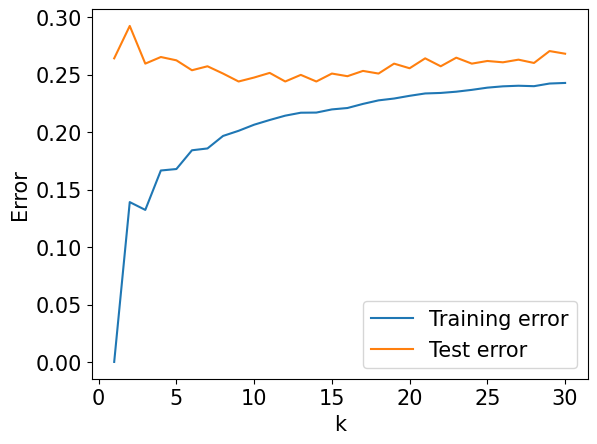

In [10]:
# K-nearest neighbors

# Distance metric (corresponds to 2nd norm, euclidean distance).
# You can set dist=1 to obtain manhattan distance (cityblock distance).
dist=2
metric = 'minkowski'
metric_params = {} # no parameters needed for minkowski

# You can set the metric argument to 'cosine' to determine the cosine distance
#metric = 'cosine' 
#metric_params = {} # no parameters needed for cosine

# To use a mahalonobis distance, we need to input the covariance matrix, too:
#metric='mahalanobis'
#metric_params={'V': cov(X_train, rowvar=False)}

# Range of k values to try
k_values = range(1, 31)

# Choose a specific k value for which to display the confusion matrix
k_display = 16

train_errors = []
test_errors = []

for K in k_values:
    knclassifier = KNeighborsClassifier(n_neighbors=K, p=dist, 
                                        metric=metric,
                                        metric_params=metric_params)
    knclassifier.fit(X_train, y_train)
    
    # Compute training error
    y_train_est = knclassifier.predict(X_train)
    train_error = np.mean(y_train_est != y_train)
    train_errors.append(train_error)
    
    # Compute test error
    y_est = knclassifier.predict(X_test)
    test_error = np.mean(y_est != y_test)
    test_errors.append(test_error)

    # Compute and plot confusion matrix for the chosen k value
    if K == k_display:
        cm = confusion_matrix(y_test, y_est)
        accuracy = 100*cm.diagonal().sum()/cm.sum()
        error_rate = 100-accuracy

        plt.figure()
        plt.imshow(cm, cmap='binary', interpolation='None')
        plt.colorbar()
        plt.xticks(range(C))
        plt.yticks(range(C))
        plt.xlabel('Predicted class')
        plt.ylabel('Actual class')
        plt.title('Confusion matrix (k={0}, Accuracy: {1}%, Error Rate: {2}%)'.format(K, accuracy, error_rate))

# Plot training and test error as a function of k
plt.figure()
plt.plot(k_values, train_errors, label='Training error')
plt.plot(k_values, test_errors, label='Test error')
plt.legend()
plt.xlabel('k')
plt.ylabel('Error')
plt.show()

In [11]:
# find the minimum test error and optimal k, and substitute in the code above
k_star = np.argmin(test_errors)
print('Optimal k: {0}'.format(k_values[k_star]))

Optimal k: 9


## Baseline method

In [13]:
def baseline_method(train, test):
    # Extract the output values
    output_values = [row for row in train]
    
    # Find the most common output value in the training set
    prediction = max(set(output_values), key=output_values.count)
    
    # Create a list of predictions for each test case based on the most common output value
    predicted = [prediction for i in range(len(test))]
    
    return predicted

In [13]:
# Compute the predictions using the baseline method
y_pred = baseline_method(y_train, y_test)

# Compute the classification error rate
baseline_error = np.mean(y_pred != y_test)

print('Baseline error rate: {0}%'.format(baseline_error*100))


Baseline error rate: 60.069044879171464%


## Two-level cross-validation


In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
from numpy import mean

# Definisci il numero di fold per entrambi i livelli di cross-validation
K1 = 10
K2 = 10

# Crea gli oggetti KFold per entrambi i livelli
kf1 = KFold(n_splits=K1, shuffle=True, random_state=1)
kf2 = KFold(n_splits=K2, shuffle=True, random_state=1)

# Inizializza delle liste per memorizzare i valori ottimali dei parametri di controllo e gli errori di generalizzazione
optimal_params_logistic = []
gen_errors_logistic = []

optimal_params_knn = []
gen_errors_knn = []

gen_errors_baseline = []

## Primo livello di cross-validation
for train_index, test_index in kf1.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Standardize the training and test set based on training set mean and std
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Inizializza una lista per memorizzare gli errori di validazione per ogni fold interno e i parametri di controllo
    val_errors_logistic = []
    val_errors_knn = []
    
    ## Secondo livello di cross-validation
    for train_index2, val_index in kf2.split(X_train):
        X_train2, X_val = X_train[train_index2], X_train[val_index]
        y_train2, y_val = y_train[train_index2], y_train[val_index]

        # a) Addestra e valuta la regressione logistica per ogni valore di lambda
        lambda_errors = []
        lambda_interval = np.logspace(0, 5, 50)
        for k in range(0, len(lambda_interval)):
            model = LogisticRegression(penalty='l2', C=1/lambda_interval[k], multi_class='multinomial', solver='lbfgs', random_state=1)
            model.fit(X_train2, y_train2)
            y_val_pred = model.predict(X_val)
            val_error = np.sum(y_val_pred != y_val) / len(y_val)
            lambda_errors.append(val_error)
        val_errors_logistic.append(lambda_errors)
        
        # b) Addestra e valuta il KNN per ogni valore di K
        K_errors = []
        K_values = range(1, 31)
        for K in K_values:
            model = KNeighborsClassifier(n_neighbors=K, p=2, metric='minkowski')
            model.fit(X_train2, y_train2)
            y_val_pred = model.predict(X_val)
            val_error = np.sum(y_val_pred != y_val) / len(y_val)
            K_errors.append(val_error)
        val_errors_knn.append(K_errors)

        
    ## Calcola il parametro di controllo ottimale per ogni modello e il relativo errore di generalizzazione

    # a) Regressione logistica

    # Converti la lista degli errori di validazione in un array NumPy
    val_errors_logistic = np.array(val_errors_logistic)
    # Calcola l'errore di validazione medio per ogni valore di lambda
    mean_val_errors_logistic = val_errors_logistic.mean(axis=0)
    # Trova il valore di lambda che produce l'errore di validazione più basso
    best_lambda_index = np.argmin(mean_val_errors_logistic)
    best_lambda = lambda_interval[best_lambda_index]
    # Addestra il miglior modello sull'intero insieme di addestramento esterno
    best_model = LogisticRegression(penalty='l2', C=1/best_lambda, multi_class='multinomial', solver='lbfgs', random_state=1)
    best_model.fit(X_train, y_train)
    # Valuta l'errore di test del miglior modello
    y_test_pred = best_model.predict(X_test)
    test_error = np.sum(y_test_pred != y_test) / len(y_test)
    # Memorizza il parametro di controllo ottimale e l'errore di generalizzazione
    optimal_params_logistic.append(best_lambda)
    gen_errors_logistic.append(test_error)

    # b) KNN (same procedure as above)

    val_errors_knn = np.array(val_errors_knn)
    mean_val_errors_knn = val_errors_knn.mean(axis=0)
    best_K_index = np.argmin(mean_val_errors_knn)
    best_K = K_values[best_K_index]
    best_model = KNeighborsClassifier(n_neighbors=best_K, p=2, metric='minkowski')
    best_model.fit(X_train, y_train)
    y_test_pred = best_model.predict(X_test)
    test_error = np.sum(y_test_pred != y_test) / len(y_test)
    optimal_params_knn.append(best_K)
    gen_errors_knn.append(test_error)

    # c) Baseline method (same procedure as above)
    
    y_test_pred = baseline_method(y_train, y_test)
    test_error = np.sum(y_test_pred != y_test) / len(y_test)
    gen_errors_baseline.append(test_error)


# Crea un DataFrame per la tabella
df = pd.DataFrame({
    'Outer fold': list(range(1, K1 + 1)),
    'KNN k*_i': optimal_params_knn,
    'KNN E^test_i': gen_errors_knn,
    'Logistic Regression lambda*_i': optimal_params_logistic,
    'Logistic Regression E^test_i': gen_errors_logistic,
    'Baseline E^test_i': gen_errors_baseline
})

# Stampa la tabella
print(df)


   Outer fold  KNN k*_i  KNN E^test_i  Logistic Regression lambda*_i  \
0           1         7      0.271577                      16.768329   
1           2         9      0.280783                     222.299648   
2           3         9      0.257192                      21.209509   
3           4        14      0.254891                     222.299648   
4           5         7      0.247411                     355.648031   
5           6         7      0.247411                     222.299648   
6           7         7      0.240506                     175.751062   
7           8        13      0.260069                     222.299648   
8           9         9      0.258918                      21.209509   
9          10         5      0.247553                     175.751062   

   Logistic Regression E^test_i  Baseline E^test_i  
0                      0.501151           0.605293  
1                      0.488493           0.606444  
2                      0.494822           0.5949

# Statistical Comparison

In [14]:
# Standardize X
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

K = 10
CV = KFold(K, shuffle=True)

# store predictions.
yhat = []
y_true = []

i=0
for train_index, test_index in CV.split(X, y): 
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]

    # Fit classifier and classify the test points (consider 1 to 40 neighbors)
    dy = []
    
    # logistic regression
    lambda_star = 222.299648
    mdl = LogisticRegression(penalty='l2', C=1/lambda_star, multi_class='multinomial', solver='lbfgs', random_state=1)
    mdl.fit(X_train, y_train)
    y_est = mdl.predict(X_test)
    dy.append( y_est )


    # knn
    k_star = 7
    knclassifier = KNeighborsClassifier(n_neighbors=k_star, p=2, metric='minkowski')
    knclassifier.fit(X_train, y_train)
    y_est = knclassifier.predict(X_test)
    dy.append( y_est )


    # baseline
    y_est = baseline_method(y_train, y_test)
    dy.append( y_est )


    dy = np.stack(dy, axis=1)
    yhat.append(dy)
    y_true.append(y_test)
    i+=1

yhat = np.concatenate(yhat)
y_true = np.concatenate(y_true)


## McNemar test

# Significance level used for the statistical tests
alpha = 0.05

# First comparison
[thetahat, CI, p] = mcnemar(y_true, yhat[:,0], yhat[:,1], alpha=alpha)
print("First comparison: Logistic Regression vs. KNN")
print("theta = theta_A-theta_B point estimate", thetahat, " CI: ", CI, "p-value", p)

# Second comparison
[thetahat, CI, p] = mcnemar(y_true, yhat[:,1], yhat[:,2], alpha=alpha)
print("Second comparison: KNN vs. Baseline")
print("theta = theta_A-theta_B point estimate", thetahat, " CI: ", CI, "p-value", p)

# Third comparison
[thetahat, CI, p] = mcnemar(y_true, yhat[:,0], yhat[:,2], alpha=alpha)
print("Third comparison: Logistic Regression vs. Baseline")
print("theta = theta_A-theta_B point estimate", thetahat, " CI: ", CI, "p-value", p)


Result of McNemars test using alpha= 0.05
Comparison matrix n
[[7107. 1631.]
 [5862. 2779.]]
Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] =  (-0.25251042063042095, -0.23437808812186478)
p-value for two-sided test A and B have same accuracy (exact binomial test): p= 0.0
First comparison: Logistic Regression vs. KNN
theta = theta_A-theta_B point estimate -0.2434547442315438  CI:  (-0.25251042063042095, -0.23437808812186478) p-value 0.0
Result of McNemars test using alpha= 0.05
Comparison matrix n
[[5360. 7609.]
 [1575. 2835.]]
Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] =  (0.3376879810453586, 0.35667820275728523)
p-value for two-sided test A and B have same accuracy (exact binomial test): p= 0.0
Second comparison: KNN vs. Baseline
theta = theta_A-theta_B point estimate 0.3472006444559526  CI:  (0.3376879810453586, 0.35667820275728523) p-value 0.0
Result of McNemars test using alpha= 0.05
Comparison matrix n
[[4459. 4279.]
 [2476. 6165.]]
Approx